# 1.Import Libraries

In [18]:
import pandas as pd
from datetime import datetime as dt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots

import seaborn as sns
import statsmodels.formula.api as sfm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #SES
from statsmodels.tsa.holtwinters import Holt  #Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARMA,ARIMA
from statsmodels.tsa.stattools import acf, pacf

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas import Grouper
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Conv1D,MaxPool1D,Conv2D,MaxPool2D

# 2.Import Dataset

In [99]:
india=pd.read_csv('New India data _1980(csv).csv',parse_dates=True,index_col=0,squeeze=True)
india  #squeez-If the parsed data only contains one column then return as Series.

,"Inflation, average consumer prices(%)","Inflation, end of period consumer prices(%)"
Year,,
1980-01-01,11.346,12.819
1981-01-01,12.654,9.048
1982-01-01,7.736,10.420
1983-01-01,12.558,10.398
1984-01-01,6.517,5.144
1985-01-01,6.251,8.920
1986-01-01,8.889,7.464
1987-01-01,9.059,9.743
1988-01-01,7.214,5.040


# 3.Data Understanding

In [100]:
india.head()

,"Inflation, average consumer prices(%)","Inflation, end of period consumer prices(%)"
Year,,
1980-01-01,11.346,12.819
1981-01-01,12.654,9.048
1982-01-01,7.736,10.420
1983-01-01,12.558,10.398
1984-01-01,6.517,5.144


In [101]:
india.tail()

,"Inflation, average consumer prices(%)","Inflation, end of period consumer prices(%)"
Year,,
2018-01-01,3.428,2.465
2019-01-01,4.762,6.668
2020-01-01,6.175,4.867
2021-01-01,5.557,5.491
2022-01-01,4.876,4.910


In [102]:
india.isna().sum()

Inflation, average consumer prices(%)          0
Inflation, end of period consumer prices(%)    0
dtype: int64

In [103]:
india.describe(include='all')

,"Inflation, average consumer prices(%)","Inflation, end of period consumer prices(%)"
count,43.000000,43.000000
mean,7.569721,7.387140
std,3.023729,2.992753
min,3.428000,2.465000
25%,4.819000,4.975000
50%,6.842000,7.001000
75%,9.912500,9.432000
max,13.483000,15.019000


In [104]:
india.dtypes

Inflation, average consumer prices(%)          float64
Inflation, end of period consumer prices(%)    float64
dtype: object

### Line plot

In [105]:
india.drop('Inflation, end of period consumer prices(%)',axis=1,inplace=True)

<Figure size 2160x720 with 0 Axes>

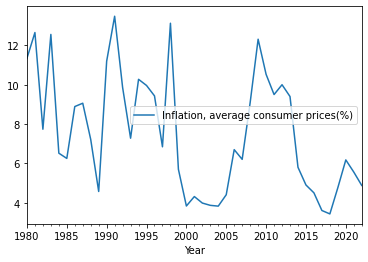

In [26]:
plt.figure(figsize=(30,10))
india.plot()
plt.show()

### Histogram

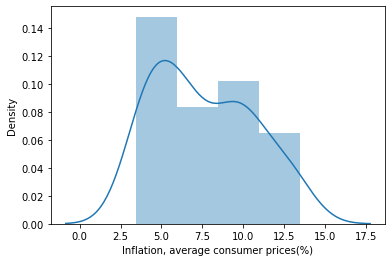

In [106]:
sns.distplot(india['Inflation, average consumer prices(%)'],hist=True)
plt.show()

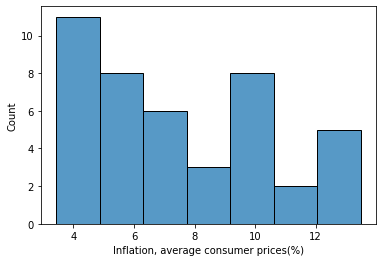

In [107]:
sns.histplot(india['Inflation, average consumer prices(%)'])
plt.show()

### Box plot

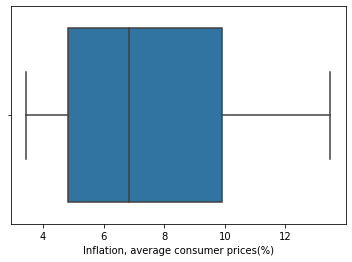

In [112]:
sns.boxplot(x=india['Inflation, average consumer prices(%)'],orient= "v")
plt.show()

In [29]:
india.shape

(43, 1)

In [30]:
india.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 1980-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Inflation, average consumer prices(%)  43 non-null     float64
dtypes: float64(1)
memory usage: 688.0 bytes


In [31]:
india.dtypes

Inflation, average consumer prices(%)    float64
dtype: object

In [32]:
india.columns

Index(['Inflation, average consumer prices(%)'], dtype='object')

# 4.Data Preprocessing

In [33]:
india.dropna(inplace=True)
india.index

DatetimeIndex(['1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

###### Creating string from
We imported datetime class from the datetime module. It's because the object of datetime class can access strftime() method.

In [34]:
from datetime import datetime as dt

In [35]:
india['Year']=pd.to_datetime(india.index,format='Y')#Y-year wise data
india['year']=india['Year'].dt.strftime('%Y')  #https://www.programiz.com/python-programming/datetime/strftime
                                               #%y-Year without century as a zero-padded decimal number.

In [36]:

india.head()

,"Inflation, average consumer prices(%)",Year,year
Year,,,
1980-01-01,11.346,1980-01-01,1980
1981-01-01,12.654,1981-01-01,1981
1982-01-01,7.736,1982-01-01,1982
1983-01-01,12.558,1983-01-01,1983
1984-01-01,6.517,1984-01-01,1984


In [37]:
india.rename(columns = {'Inflation, average consumer prices(%)':'inflation_rate'}, inplace = True)
india.head()

,inflation_rate,Year,year
Year,,,
1980-01-01,11.346,1980-01-01,1980
1981-01-01,12.654,1981-01-01,1981
1982-01-01,7.736,1982-01-01,1982
1983-01-01,12.558,1983-01-01,1983
1984-01-01,6.517,1984-01-01,1984


In [38]:
india.shape

(43, 3)

### Up sampling to get monthly data

In [39]:
india_month = india.resample('M').mean()
india_month

,inflation_rate
Year,
1980-01-31,11.346
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
...,...
2021-09-30,NaN
2021-10-31,NaN
2021-11-30,NaN


### Interpolation
=> Is a technique in Python used to estimate unknown data points between two      known data points. Interpolation is mostly used to impute missing values in    the dataframe or series while preprocessing data.

=> A good starting point is to use a linear interpolation. This draws a straight line between available data,in this case on the first of the month,and fills in the values at the chosen frequency from this line.

In [40]:
india_month_interpolated = india_month.interpolate(method= 'linear')
india_month_interpolated.head(40)

,inflation_rate
Year,
1980-01-31,11.346000
1980-02-29,11.455000
1980-03-31,11.564000
1980-04-30,11.673000
1980-05-31,11.782000
1980-06-30,11.891000
1980-07-31,12.000000
1980-08-31,12.109000
1980-09-30,12.218000


In [41]:
india_month_interpolated.shape

(505, 1)

In [42]:
india_month_interpolated["t"] = np.arange(0,505)
india_month_interpolated["t_squared"] = india_month_interpolated["t"]*india_month_interpolated["t"]
india_month_interpolated["log_inflation"] = np.log(india_month_interpolated['inflation_rate'])
india_month_interpolated.columns
india_month_interpolated.head()

,inflation_rate,t,t_squared,log_inflation
Year,,,,
1980-01-31,11.346,0,0,2.428865
1980-02-29,11.455,1,1,2.438426
1980-03-31,11.564,2,4,2.447897
1980-04-30,11.673,3,9,2.457278
1980-05-31,11.782,4,16,2.466573


In [43]:
india_month_interpolated['Year']=pd.to_datetime(india_month_interpolated.index,format='Y')
india_month_interpolated['month']=india_month_interpolated['Year'].dt.strftime('%b')
india_month_interpolated['year']=india_month_interpolated['Year'].dt.strftime('%Y')
india_month_interpolated.head()

,inflation_rate,t,t_squared,log_inflation,Year,month,year
Year,,,,,,,
1980-01-31,11.346,0,0,2.428865,1980-01-31,Jan,1980
1980-02-29,11.455,1,1,2.438426,1980-02-29,Feb,1980
1980-03-31,11.564,2,4,2.447897,1980-03-31,Mar,1980
1980-04-30,11.673,3,9,2.457278,1980-04-30,Apr,1980
1980-05-31,11.782,4,16,2.466573,1980-05-31,May,1980


### Monthly Boxplots

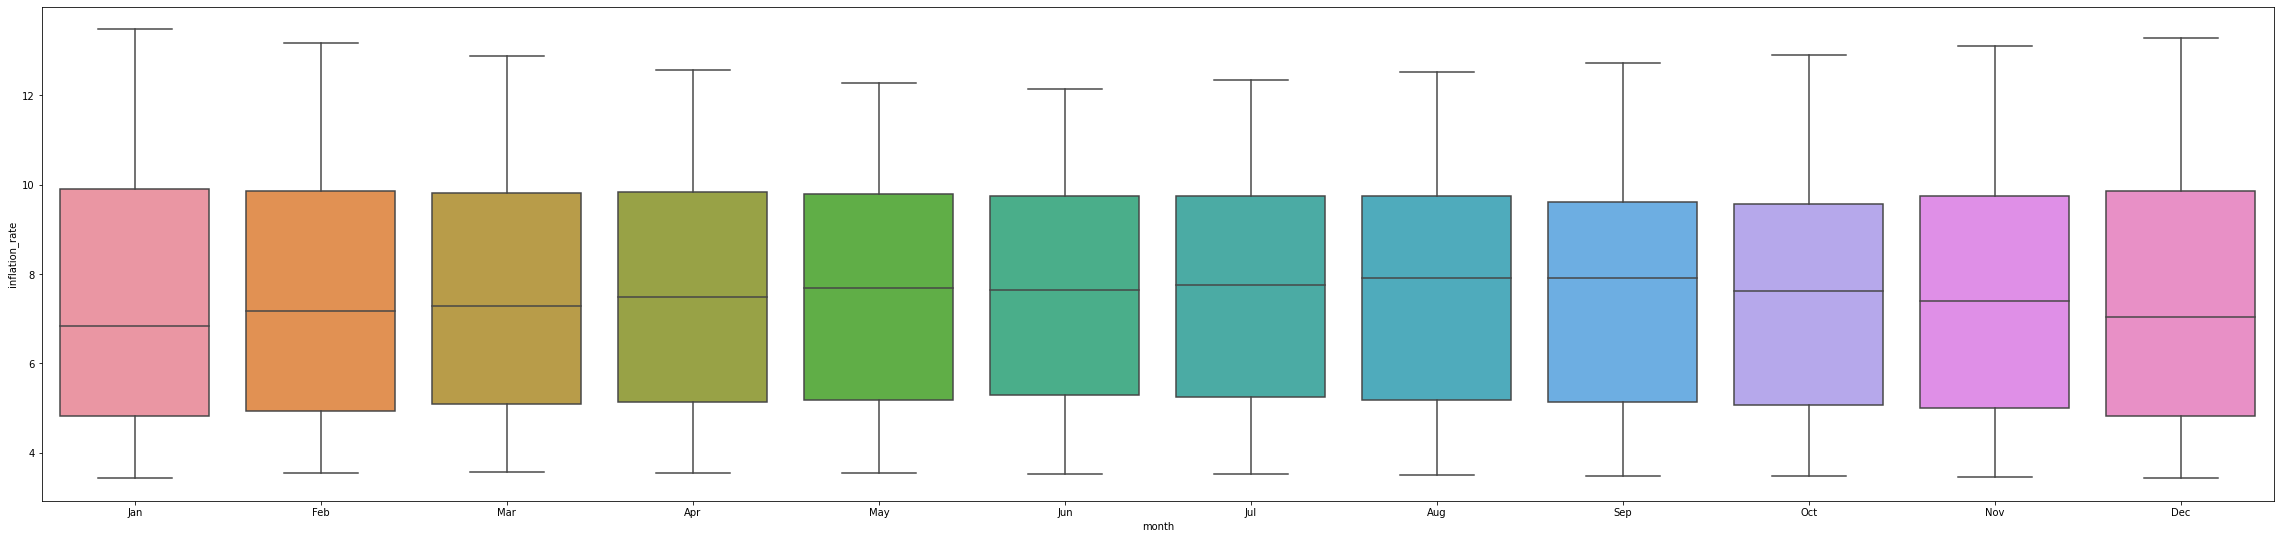

In [44]:
plt.figure(figsize=(40,20))
plt.subplot(211)
sns.boxplot(x="month",y='inflation_rate',data=india_month_interpolated)
plt.show()

### Yearly Boxplots

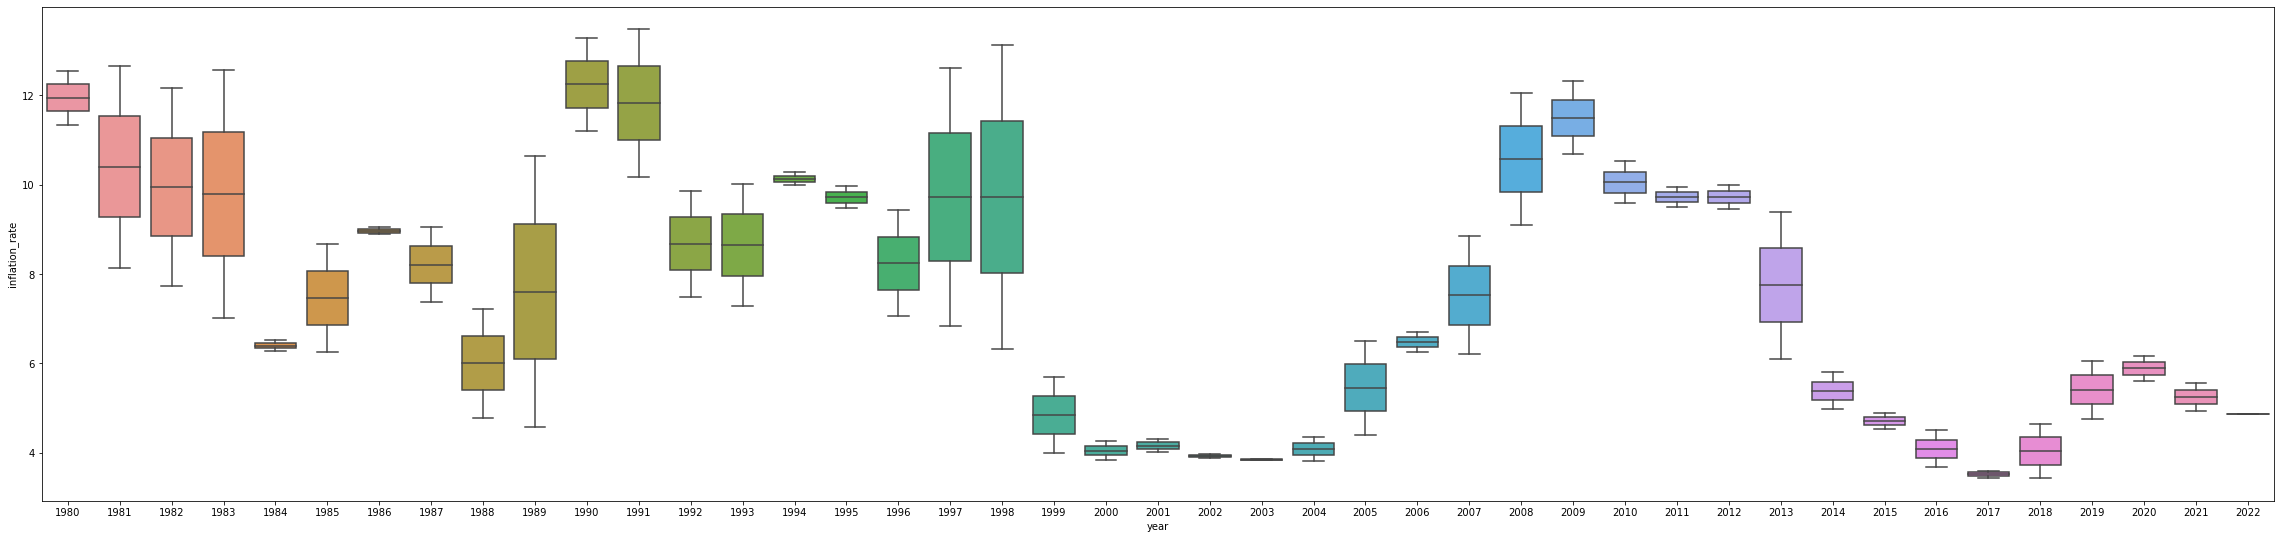

In [45]:
plt.figure(figsize=(40,20))
plt.subplot(211)
sns.boxplot(x="year",y="inflation_rate",data=india_month_interpolated)
plt.show()

### Lag plot
Creating a lag plot enables you to check for randomness. Random data will spread fairly evenly both horizontally and vertically. If you cannot see a pattern in the graph, your data is most probably random. On the other hand a shape or trend to the graph (like a linear pattern) indicates the data is not random.

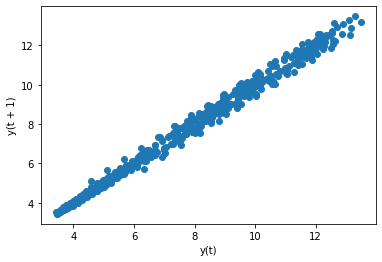

In [46]:
lag_plot(india_month_interpolated['inflation_rate'])
plt.show()

### ACF abd PACF plot
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values . We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values.

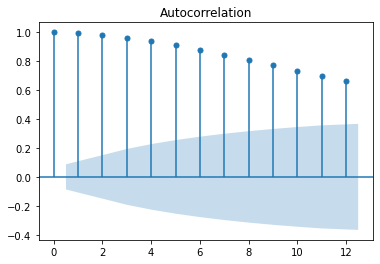

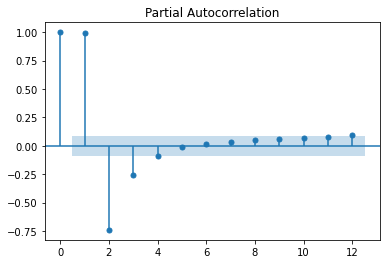

In [47]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(india_month_interpolated.inflation_rate,lags=12)
tsa_plots.plot_pacf(india_month_interpolated.inflation_rate,lags=12)
plt.show()

### Time series decomposition plot

<Figure size 1440x792 with 0 Axes>

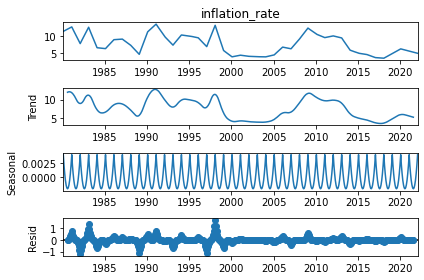

In [48]:
plt.figure(figsize=(20,11))
decompose_ts_add = seasonal_decompose(india_month_interpolated['inflation_rate'],period=12)
decompose_ts_add.plot()
plt.show()

### Machine learning models require all input and output variables to be numeric.
This means that if your data contains categorical data, you must encode(One-Hot Encoding) it to numbers before you can fit and evaluate a model. One of the ways to convert categorical variables to numeric variables is the use of pandas get_dummies method. 
When using the dummies method, we should be careful not to run into the dummy variable trap. Dummy variable trap causes multicollinearity, a situation where independent variables are highly correlated leading to inaccurate results.

In [54]:
dummies=pd.DataFrame(pd.get_dummies(india_month_interpolated['month']))
india_month_interpolated=pd.concat([india_month_interpolated,dummies],axis=1)
india_month_interpolated.to_csv('india_month.csv', header=True, index=True)

In [50]:
inflation_pivot=pd.pivot_table(data = india_month_interpolated,values='inflation_rate',index='year',columns='month').fillna(0)
inflation_pivot

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1980,11.67300,12.109000,12.545000,11.455000,11.346,12.0000,11.891000,11.564000,11.782000,12.436000,12.32700,12.218000
1981,11.42450,9.785167,8.145833,12.244167,12.654,10.1950,10.604833,11.834333,11.014667,8.555667,8.96550,9.375333
1982,8.94150,10.548833,12.156167,8.137833,7.736,10.1470,9.745167,8.539667,9.343333,11.754333,11.35250,10.950667
1983,11.04775,9.034083,7.020417,12.054583,12.558,9.5375,10.040917,11.551167,10.544333,7.523833,8.02725,8.530667
1984,6.45050,6.361833,6.273167,6.494833,6.517,6.3840,6.406167,6.472667,6.428333,6.295333,6.31750,6.339667
1985,6.91050,7.789833,8.669167,6.470833,6.251,7.5700,7.350167,6.690667,7.130333,8.449333,8.22950,8.009667
1986,8.93150,8.988167,9.044833,8.903167,8.889,8.9740,8.959833,8.917333,8.945667,9.030667,9.01650,9.002333
1987,8.59775,7.982750,7.367750,8.905250,9.059,8.1365,8.290250,8.751500,8.444000,7.521500,7.67525,7.829000
1988,6.55275,5.671083,4.789417,6.993583,7.214,5.8915,6.111917,6.773167,6.332333,5.009833,5.23025,5.450667


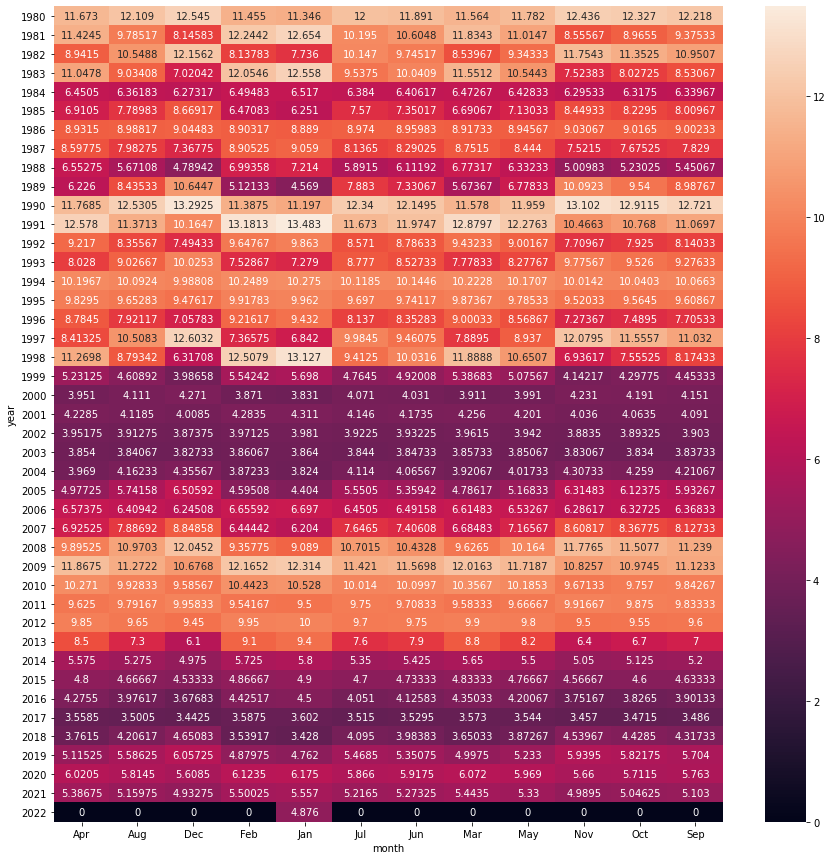

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(inflation_pivot,annot=True,fmt='g')
plt.show()

## 5.Data Preparation

###  Dividing the Data into Train and Test Data

<function matplotlib.pyplot.show(close=None, block=None)>

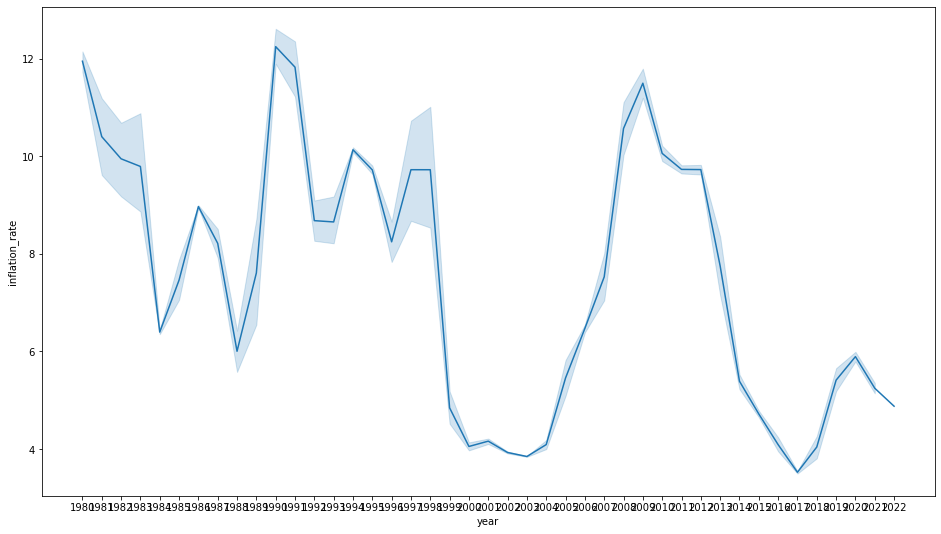

In [35]:
#line plot
plt.figure(figsize=(16,9))
sns.lineplot(x='year',y='inflation_rate', data=india_month_interpolated)
plt.show

In [36]:
india_month_interpolated.shape

(505, 19)

In [37]:
train = india_month_interpolated.head(455)
train

,inflation_rate,t,t_squared,log_inflation,Year,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,,,,,,,,
1980-01-31,11.3460,0,0,2.428865,1980-01-31,Jan,1980,0,0,0,0,1,0,0,0,0,0,0,0
1980-02-29,11.4550,1,1,2.438426,1980-02-29,Feb,1980,0,0,0,1,0,0,0,0,0,0,0,0
1980-03-31,11.5640,2,4,2.447897,1980-03-31,Mar,1980,0,0,0,0,0,0,0,1,0,0,0,0
1980-04-30,11.6730,3,9,2.457278,1980-04-30,Apr,1980,1,0,0,0,0,0,0,0,0,0,0,0
1980-05-31,11.7820,4,16,2.466573,1980-05-31,May,1980,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-31,3.5150,450,202500,1.257040,2017-07-31,Jul,2017,0,0,0,0,0,1,0,0,0,0,0,0
2017-08-31,3.5005,451,203401,1.252906,2017-08-31,Aug,2017,0,1,0,0,0,0,0,0,0,0,0,0
2017-09-30,3.4860,452,204304,1.248755,2017-09-30,Sep,2017,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
test = india_month_interpolated.tail(50)
test

,inflation_rate,t,t_squared,log_inflation,Year,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,,,,,,,,
2017-12-31,3.442500,455,207025,1.236198,2017-12-31,Dec,2017,0,0,1,0,0,0,0,0,0,0,0,0
2018-01-31,3.428000,456,207936,1.231977,2018-01-31,Jan,2018,0,0,0,0,1,0,0,0,0,0,0,0
2018-02-28,3.539167,457,208849,1.263891,2018-02-28,Feb,2018,0,0,0,1,0,0,0,0,0,0,0,0
2018-03-31,3.650333,458,209764,1.294818,2018-03-31,Mar,2018,0,0,0,0,0,0,0,1,0,0,0,0
2018-04-30,3.761500,459,210681,1.324818,2018-04-30,Apr,2018,1,0,0,0,0,0,0,0,0,0,0,0
2018-05-31,3.872667,460,211600,1.353943,2018-05-31,May,2018,0,0,0,0,0,0,0,0,1,0,0,0
2018-06-30,3.983833,461,212521,1.382245,2018-06-30,Jun,2018,0,0,0,0,0,0,1,0,0,0,0,0
2018-07-31,4.095000,462,213444,1.409767,2018-07-31,Jul,2018,0,0,0,0,0,1,0,0,0,0,0,0
2018-08-31,4.206167,463,214369,1.436552,2018-08-31,Aug,2018,0,1,0,0,0,0,0,0,0,0,0,0


### 6.Model Training  | 7.Model Testing  | 8.Model Evaluation

In [39]:
#Linear Model
import statsmodels.formula.api as smf 
import numpy as np

#Model Training
linear_model = smf.ols('inflation_rate~t',data=train).fit()

#Model Prediction
pred_linear =  linear_model.predict(test['t'])

#Model Evaluation
rmse_linear = np.sqrt(np.mean((np.array(test['inflation_rate'])-np.array(pred_linear))**2))
rmse_linear

1.0793343945330967

In [40]:
#Exponential

#Model Training
Exp = smf.ols('log_inflation~t',data=train).fit()

#Model Prediction
pred_Exp = Exp.predict(pd.DataFrame(test['t']))

#Model Evaluation
rmse_Exp = np.sqrt(np.mean((np.array(test['inflation_rate'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

0.8796098375669068

In [41]:
#Quadratic 

#Model Training
Quad = smf.ols('inflation_rate~t+t_squared',data=train).fit()

#Model Prediction
pred_Quad = Quad.predict(test[["t","t_squared"]])

#Model Evaluation
rmse_Quad = np.sqrt(np.mean((np.array(test['inflation_rate'])-np.array(pred_Quad))**2))
rmse_Quad

1.4342920344745687

In [42]:
#Additive seasonality 

#Model Training
add_sea = smf.ols('inflation_rate~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()

##Model Prediction
pred_add_sea = add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])

#Model Evaluation
rmse_add_sea = np.sqrt(np.mean((np.array(test['inflation_rate'])-np.array(pred_add_sea))**2))
rmse_add_sea

2.832003410582204

In [43]:
#Additive Seasonality Quadratic 

#Model Training
add_sea_Quad = smf.ols('inflation_rate~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()

#Model Prediction
pred_add_sea_quad = add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']])

#Model Evaluation
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['inflation_rate'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1.4391294500938447

In [44]:
#Multiplicative Seasonality

#Model Training
Mul_sea = smf.ols('log_inflation~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()

#Model Prediction
pred_Mult_sea = Mul_sea.predict(test)

#Model Evaluation
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['inflation_rate'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2.3236474505825337

In [45]:
#Multiplicative Additive Seasonality 

#Model Training
Mul_Add_sea = smf.ols('log_inflation~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()

#Model Prediction
pred_Mult_add_sea = Mul_Add_sea.predict(test)

#Model Evaluation
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['inflation_rate'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

0.8807784478139778

In [46]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])  #rmse_Mult_add_sea is the best model as less error

,MODEL,RMSE_Values
1,rmse_Exp,0.879610
6,rmse_Mult_add_sea,0.880778
0,rmse_linear,1.079334
2,rmse_Quad,1.434292
4,rmse_add_sea_quad,1.439129
5,rmse_Mult_sea,2.323647
3,rmse_add_sea,2.832003


## 9.Data driven forcasting

### Moving Average

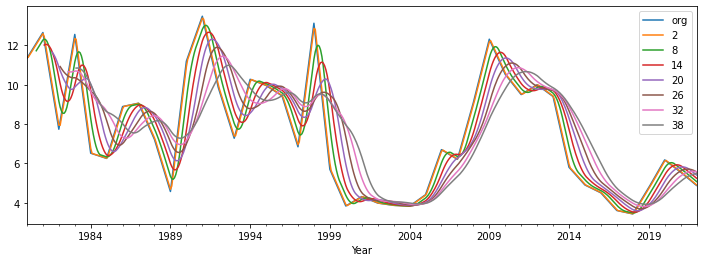

In [47]:
plt.figure(figsize =(12,4))             #blue-original trend
india_month_interpolated.inflation_rate.plot(label ='org')
for i in range(2,43,6):
    india_month_interpolated['inflation_rate'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

### Simple Exponential Smoothing model

In [48]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_percentage_error

In [49]:
#forecast - based on current time  #One level smoothing
ses_model = SimpleExpSmoothing(train['inflation_rate']).fit(smoothing_level=0.2) #alfa = 20% weightage which is 0.2

pred_ses = ses_model.predict(start=test.index[0],end = test.index[-1])
ses_rms=mean_absolute_percentage_error(test['inflation_rate'],pred_ses)*100
ses_rms

29.064329837938224

### Holt model

In [50]:
#forecast - based on current time,trend(two levels of smoothing)
from statsmodels.tsa.holtwinters import Holt

hw_model = Holt(train['inflation_rate']).fit(smoothing_level=0.8,smoothing_slope=0.2) #alfa =20% weightage which is 0.2 

pred_hw = hw_model.predict(start=test.index[0],end = test.index[-1])
hw_rms=mean_absolute_percentage_error(test['inflation_rate'],pred_hw)*100
hw_rms

40.20829724135685

### Holt winter exponential smoothing with multiplicative seasonality and additive trend

In [51]:
#forecast - based on current time,seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing #three levels of smoothing

hwe_model_mul_add = ExponentialSmoothing(train['inflation_rate'],seasonal='mul',trend='add',seasonal_periods=12).fit() 

pred_hwe_mul_add = hwe_model_mul_add.predict(start=test.index[0],end = test.index[-1])
hwe_ma_rms=mean_absolute_percentage_error(pred_hwe_mul_add,test['inflation_rate'])*100
hwe_ma_rms

88.29789907779812

### Holt winter exponential smoothing with additive seasonality and multiplicative trend

In [52]:
#forecast - based on current time,seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing #three levels of smoothing

hwe_model_mul_add = ExponentialSmoothing(train['inflation_rate'],seasonal='add',trend='mul',seasonal_periods=12).fit() 

pred_hwe_mul_add = hwe_model_mul_add.predict(start=test.index[0],end = test.index[-1])
hwe_ma_rms=mean_absolute_percentage_error(pred_hwe_mul_add,test['inflation_rate'])*100
hwe_ma_rms

46.99699697405212

###  Holt winter exponential smoothing with additive seasonality and additive trend

In [53]:
hwe_model_add_add = ExponentialSmoothing(train['inflation_rate'],seasonal='add',trend='add',seasonal_periods=12).fit() 

pred_hwe_add_add = hwe_model_add_add.predict(start=test.index[0],end = test.index[-1])
hwe_aa_rms=mean_absolute_percentage_error(pred_hwe_add_add,test['inflation_rate'])*100
hwe_aa_rms

68.74723150286376

### ARMA Model
Autoregressive, moving average models

AR(p)
Yt = δ + φ1 Yt-1 + φ2 Yt-2 + … + φp Yt-p + at

MA(q)
Yt = μ + at - θ1 at-1 - θ2 at-2 -... - θq at-q!! ! Watch negative signs

ARMA(p,q)
Yt = δ + φ1 Yt-1 + φ2 Yt-2 + at - θ1 at-1 ! ! ! ARMA(2,1)

In [54]:
from statsmodels.tsa.arima_model import ARMA

ARMAmodel = ARMA(train['inflation_rate'],order=(1,0))  #model with AR=1(p) AND MA=0(q)
ARMAmodel_fit=ARMAmodel.fit()


ARMA_pred=ARMAmodel_fit.predict(0,49)
ARMA_pred

arma_rms = mean_absolute_percentage_error(ARMA_pred,test['inflation_rate'])*100
arma_rms


48.845579447794364

### ARIMA

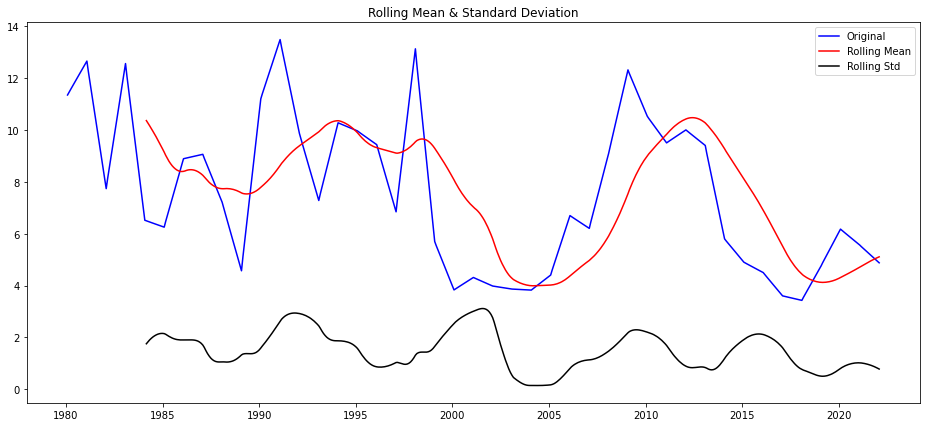

In [55]:
rollmean=india_month_interpolated['inflation_rate'].rolling(50).mean() #50 entries
rollstd = india_month_interpolated['inflation_rate'].rolling(50).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#plot rolling statistics
orig = plt.plot(india_month_interpolated['inflation_rate'],color = 'blue',label = 'Original')
mean = plt.plot(rollmean,color='red',label = 'Rolling Mean')
std = plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

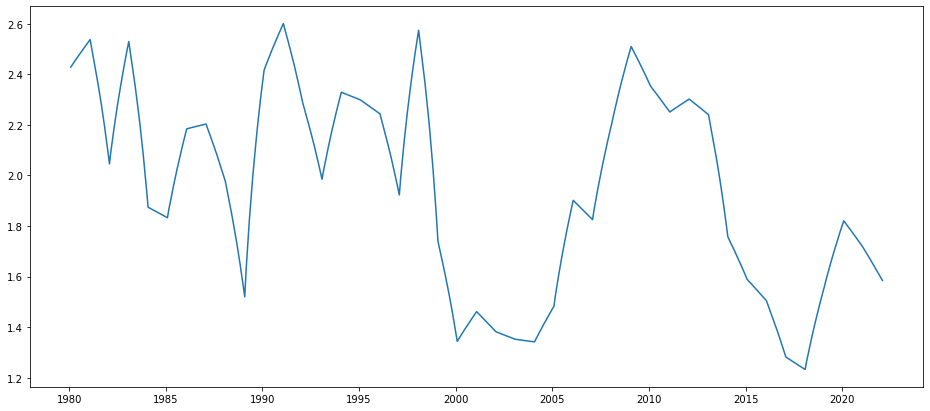

In [56]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

ts_log = np.log(india_month_interpolated['inflation_rate']) #to transform to stationary from non-stationary
plt.plot(ts_log)

### Differencing
Used in a time series data for taking lagged version of time series data.

**Note:** Untill we get a stationary data,we continue to take a lag.

=>Without differencing we can not use **ARIMA MODEL** for forecasting,because ARIMA model can not be used for trend data.So to making stationary data we uses differencing.

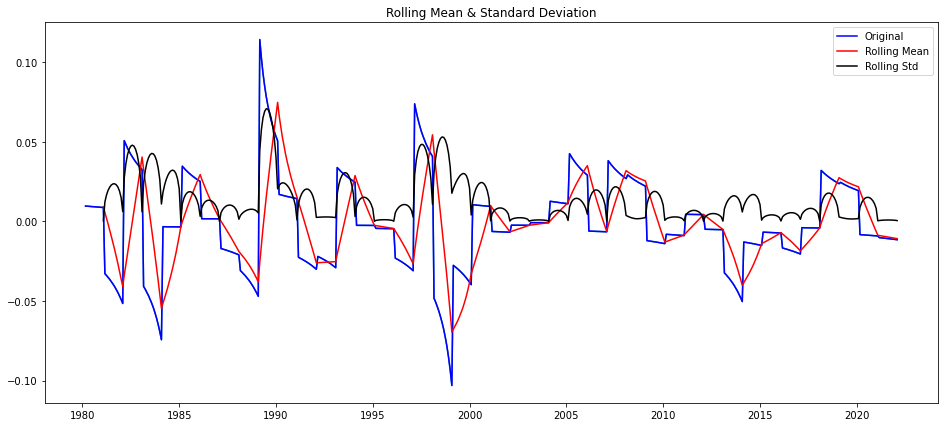

In [57]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift(periods=1) # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [58]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(ts_log_diff,nlags = 12)
lag_pacf = pacf(ts_log_diff,nlags = 12)

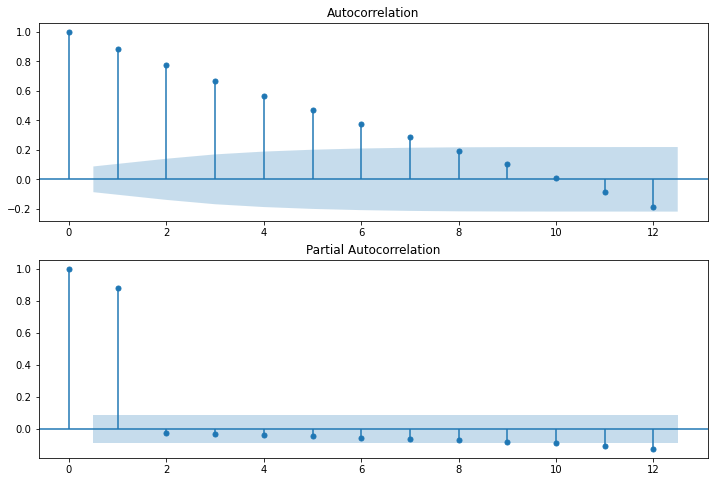

In [59]:
import statsmodels.api as sm
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=12,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=12,ax=ax2)

In [60]:
import itertools
p = range(0,5) #AR ORDER
d = range(0,5) #shift
q = range(0,5) #MA ORDER
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [61]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima=ARIMA(train['inflation_rate'],order=param)
        model_arima_fit= model_arima.fit()
        print(param,model_arima_fit.aic) #aic-acihiqi information criteria
    except:
        continue

(0, 0, 0) 2218.3339259271515
(0, 0, 1) 1599.5583513397075
(0, 1, 0) 18.27473014536679
(0, 1, 1) -346.74003740901526
(0, 1, 2) -504.16430094482985
(0, 1, 3) -585.9281763115976
(0, 1, 4) -629.7520986601514
(0, 2, 0) -669.002455861237
(0, 2, 1) -667.0024558755158
(0, 2, 2) -665.0024558898258
(0, 2, 3) -663.0024559041663
(0, 2, 4) -661.0024559185372
(1, 0, 0) 27.37254076453064
(1, 0, 1) -338.58327576797024
(1, 0, 2) -496.84144604883136
(1, 0, 3) -584.6304374198471
(1, 1, 0) -693.3419559853248
(1, 1, 1) -692.6812926111832
(1, 1, 2) -691.9688882700009
(1, 1, 3) -691.1714550208906
(1, 1, 4) -690.3452312190786
(1, 2, 0) -667.0024558755158
(1, 2, 1) -665.0024558755119
(1, 2, 2) -663.002455889824
(1, 2, 3) -661.0024559041553
(1, 2, 4) -659.0024559185417
(2, 0, 0) -701.7886958655288
(2, 0, 1) -700.0030712753837
(2, 0, 2) -698.3142159402439
(2, 0, 3) -696.7153097051487
(2, 0, 4) -695.1877235520815
(2, 1, 0) -692.8598850874489
(2, 1, 1) -707.6024197301008
(2, 1, 2) -706.4330121767621
(2, 1, 3) -705

In [62]:
from statsmodels.tsa.arima_model import ARIMA

ARIMAmodel = ARIMA(train['inflation_rate'],order =(4,1,4)) #(p,d,q) value
ARIMAmodel_fit = ARIMAmodel.fit()

ARIMA_pred = ARIMAmodel_fit.predict(1,50,typ = 'levels')

arima_rms = mean_absolute_percentage_error(ARIMA_pred,test['inflation_rate'])*100
arima_rms

47.795391396399374

In [101]:
data1 = {"MODEL":pd.Series(["Simple_exp_smoothing","Holt_model","Holt_wilter_exp_smoothing_mult_add_trend","Holt_wilter_exp_smoothing_add_seas_mult_trend","ARMA Model","ARIMA","LSTM"]),
        "RMSE_Values":pd.Series([ses_rms,hw_rms,hwe_ma_rms,hwe_aa_rms,arma_rms,arima_rms,lstm_rmse])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,LSTM,7.366545
0,Simple_exp_smoothing,29.064330
1,Holt_model,40.208297
2,Holt_wilter_exp_smoothing_mult_add_trend,46.996997
5,ARIMA,47.795391
4,ARMA Model,48.845579
3,Holt_wilter_exp_smoothing_add_seas_mult_trend,68.747232


## LSTM Modeling

In [62]:
india1=pd.read_csv('India_inflation_data _1980.csv')
india1.head()

,Year,"Inflation, average consumer prices(%)","Inflation, end of period consumer prices(%)"
0,1980.0,11.346,12.819
1,1981.0,12.654,9.048
2,1982.0,7.736,10.420
3,1983.0,12.558,10.398
4,1984.0,6.517,5.144


In [63]:
india1.rename(columns={'Inflation, average consumer prices(%)':'inflation_rate'},inplace=True)

In [64]:
india1.drop('Inflation, end of period consumer prices(%)',inplace=True,axis=1)

In [65]:
india_month1 = india.resample('M').mean()
india_month1

,inflation_rate
Year,
1980-01-31,11.346
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
...,...
2021-09-30,NaN
2021-10-31,NaN
2021-11-30,NaN


In [66]:
india_month_interpolated1 = india_month1.interpolate(method='linear')
india_month_interpolated1.head(40)
india_month_interpolated1.to_csv('india_month_interpolated1.csv', header=True, index=True)

In [67]:
df1=india_month_interpolated1.reset_index()['inflation_rate']
df1

0      11.34600
1      11.45500
2      11.56400
3      11.67300
4      11.78200
         ...   
500     5.10300
501     5.04625
502     4.98950
503     4.93275
504     4.87600
Name: inflation_rate, Length: 505, dtype: float64

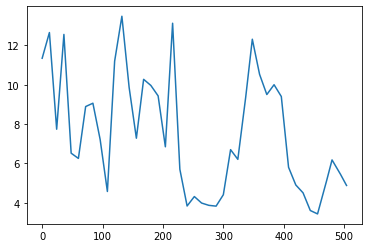

In [69]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [70]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler to transform our values 0 to 1

In [68]:
scaler = MinMaxScaler(feature_range=(0,1)) #This transformation is often used as an alternative to zero mean, unit variance scaling.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.78746892],
       [0.7983093 ],
       [0.80914968],
       [0.81999005],
       [0.83083043],
       [0.84167081],
       [0.85251119],
       [0.86335157],
       [0.87419194],
       [0.88503232],
       [0.8958727 ],
       [0.90671308],
       [0.91755346],
       [0.8767943 ],
       [0.83603514],
       [0.79527598],
       [0.75451682],
       [0.71375767],
       [0.67299851],
       [0.63223935],
       [0.59148019],
       [0.55072103],
       [0.50996188],
       [0.46920272],
       [0.42844356],
       [0.46840709],
       [0.50837063],
       [0.54833416],
       [0.5882977 ],
       [0.62826123],
       [0.66822476],
       [0.7081883 ],
       [0.74815183],
       [0.78811537],
       [0.8280789 ],
       [0.86804243],
       [0.90800597],
       [0.85793967],
       [0.80787336],
       [0.75780706],
       [0.70774076],
       [0.65767446],
       [0.60760816],
       [0.55754185],
       [0.50747555],
       [0.45740925],
       [0.40734295],
       [0.357

In [72]:
df1.shape

(505, 1)

### Splitting Dataset into Train and Test split
Always remember that in time-series data the one data is dependent on other data. The training size should be 65% of the total length of the data frame, the test size should be the difference between the length of the dataset and the training size.


In [69]:
training_size=int(len(df1)*0.65)
training_size

328

In [70]:
test_size=len(df1)-training_size
test_size

177

In [71]:
train_data=df1[:training_size]
train_data

array([[0.78746892],
       [0.7983093 ],
       [0.80914968],
       [0.81999005],
       [0.83083043],
       [0.84167081],
       [0.85251119],
       [0.86335157],
       [0.87419194],
       [0.88503232],
       [0.8958727 ],
       [0.90671308],
       [0.91755346],
       [0.8767943 ],
       [0.83603514],
       [0.79527598],
       [0.75451682],
       [0.71375767],
       [0.67299851],
       [0.63223935],
       [0.59148019],
       [0.55072103],
       [0.50996188],
       [0.46920272],
       [0.42844356],
       [0.46840709],
       [0.50837063],
       [0.54833416],
       [0.5882977 ],
       [0.62826123],
       [0.66822476],
       [0.7081883 ],
       [0.74815183],
       [0.78811537],
       [0.8280789 ],
       [0.86804243],
       [0.90800597],
       [0.85793967],
       [0.80787336],
       [0.75780706],
       [0.70774076],
       [0.65767446],
       [0.60760816],
       [0.55754185],
       [0.50747555],
       [0.45740925],
       [0.40734295],
       [0.357

In [72]:
test_data=df1[training_size:len(df1)]
test_data

array([[0.37172219],
       [0.39563236],
       [0.41954252],
       [0.44345268],
       [0.46736284],
       [0.491273  ],
       [0.51518316],
       [0.53909332],
       [0.56300348],
       [0.58973148],
       [0.61645947],
       [0.64318747],
       [0.66991546],
       [0.69664346],
       [0.72337146],
       [0.75009945],
       [0.77682745],
       [0.80355545],
       [0.83028344],
       [0.85701144],
       [0.88373943],
       [0.86893751],
       [0.85413559],
       [0.83933366],
       [0.82453174],
       [0.80972982],
       [0.7949279 ],
       [0.78012597],
       [0.76532405],
       [0.75052213],
       [0.73572021],
       [0.72091828],
       [0.70611636],
       [0.69759655],
       [0.68907674],
       [0.68055694],
       [0.67203713],
       [0.66351732],
       [0.65499751],
       [0.64647771],
       [0.6379579 ],
       [0.62943809],
       [0.62091828],
       [0.61239848],
       [0.60387867],
       [0.60802254],
       [0.61216642],
       [0.616

### Data Preprocessing
Now consider the time steps, if I want to predict the **Inflation Rate**  for consecutive month that how previous data should be considered.

Now the timestep value will be 100. Let’s split the data X, Y. In the 0th iteration the first 100 elements goes as your first record and the 101 elements will be put up in the X. The 100 elements will be put up in the Y.

In [75]:
# convert an array of values into a dataset matrix
def create_dataset(dataset , time_step =100):
    dataX ,dataY =[] , []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]   #i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i+time_step ,0])
    return np.array(dataX), np.array(dataY)

In [76]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [77]:
print(X_train.shape), print(y_train.shape)

(227, 100)
(227,)


(None, None)

In [78]:
print(X_test.shape), print(y_test.shape)

(76, 100)
(76,)


(None, None)

## LSTM
LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is that LSTM can store past important information and forget the information that is not.
LSTM has three gates:

The input gate: The input gate adds information to the cell state,

The forget gate: It removes the information that is no longer required by the model,

The output gate: Output Gate at LSTM selects the information to be shown as output.
 

While Implementing any LSTM, we should always reshape our X train in 3-D, add 1 the reason behind is the time step and the 1 is given to the LSTM.

In [79]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [80]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_training = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 1000,batch_size=64,verbose=1)

Epoch 1/1000
4/4 [==============================] - 5s 403ms/step - loss: 0.1675 - val_loss: 0.0067
Epoch 2/1000
4/4 [==============================] - 0s 122ms/step - loss: 0.0591 - val_loss: 0.0285
Epoch 3/1000
4/4 [==============================] - 1s 124ms/step - loss: 0.0494 - val_loss: 0.0087
Epoch 4/1000
4/4 [==============================] - 0s 124ms/step - loss: 0.0446 - val_loss: 0.0067
Epoch 5/1000
4/4 [==============================] - 0s 121ms/step - loss: 0.0425 - val_loss: 0.0113
Epoch 6/1000
4/4 [==============================] - 0s 119ms/step - loss: 0.0352 - val_loss: 0.0150
Epoch 7/1000
4/4 [==============================] - 0s 123ms/step - loss: 0.0353 - val_loss: 0.0116
Epoch 8/1000
4/4 [==============================] - 0s 121ms/step - loss: 0.0317 - val_loss: 0.0070
Epoch 9/1000
4/4 [==============================] - 0s 124ms/step - loss: 0.0308 - val_loss: 0.0057
Epoch 10/1000
4/4 [==============================] - 0s 122ms/step - loss: 0.0283 - val_loss: 0.0070

4/4 [==============================] - 0s 118ms/step - loss: 0.0012 - val_loss: 5.4426e-04
Epoch 82/1000
4/4 [==============================] - 0s 111ms/step - loss: 0.0012 - val_loss: 5.1858e-04
Epoch 83/1000
4/4 [==============================] - 0s 115ms/step - loss: 0.0011 - val_loss: 9.4829e-04
Epoch 84/1000
4/4 [==============================] - 0s 113ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 85/1000
4/4 [==============================] - 0s 118ms/step - loss: 0.0015 - val_loss: 8.7833e-04
Epoch 86/1000
4/4 [==============================] - 0s 117ms/step - loss: 0.0018 - val_loss: 5.1054e-04
Epoch 87/1000
4/4 [==============================] - 0s 115ms/step - loss: 0.0014 - val_loss: 5.3948e-04
Epoch 88/1000
4/4 [==============================] - 0s 121ms/step - loss: 0.0012 - val_loss: 8.1997e-04
Epoch 89/1000
4/4 [==============================] - 0s 116ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 90/1000
4/4 [==============================] - 0s 116ms/step - loss: 0.

4/4 [==============================] - 0s 118ms/step - loss: 6.2743e-04 - val_loss: 2.2899e-04
Epoch 158/1000
4/4 [==============================] - 0s 120ms/step - loss: 7.7409e-04 - val_loss: 1.9788e-04
Epoch 159/1000
4/4 [==============================] - 0s 116ms/step - loss: 8.1963e-04 - val_loss: 1.9825e-04
Epoch 160/1000
4/4 [==============================] - 0s 113ms/step - loss: 5.7431e-04 - val_loss: 2.1145e-04
Epoch 161/1000
4/4 [==============================] - 0s 113ms/step - loss: 5.2506e-04 - val_loss: 2.2049e-04
Epoch 162/1000
4/4 [==============================] - 0s 121ms/step - loss: 4.8926e-04 - val_loss: 2.3422e-04
Epoch 163/1000
4/4 [==============================] - 0s 118ms/step - loss: 4.6872e-04 - val_loss: 2.6734e-04
Epoch 164/1000
4/4 [==============================] - 0s 119ms/step - loss: 4.5243e-04 - val_loss: 2.3448e-04
Epoch 165/1000
4/4 [==============================] - 0s 121ms/step - loss: 4.6512e-04 - val_loss: 2.3074e-04
Epoch 166/1000
4/4 [=====

4/4 [==============================] - 0s 124ms/step - loss: 4.0922e-04 - val_loss: 3.1529e-04
Epoch 232/1000
4/4 [==============================] - 0s 116ms/step - loss: 3.1790e-04 - val_loss: 4.1792e-04
Epoch 233/1000
4/4 [==============================] - 0s 115ms/step - loss: 5.1519e-04 - val_loss: 7.0991e-04
Epoch 234/1000
4/4 [==============================] - 0s 115ms/step - loss: 5.8737e-04 - val_loss: 5.1220e-04
Epoch 235/1000
4/4 [==============================] - 0s 117ms/step - loss: 9.3696e-04 - val_loss: 3.8238e-04
Epoch 236/1000
4/4 [==============================] - 0s 118ms/step - loss: 8.5124e-04 - val_loss: 4.4764e-04
Epoch 237/1000
4/4 [==============================] - 0s 119ms/step - loss: 7.4958e-04 - val_loss: 1.8298e-04
Epoch 238/1000
4/4 [==============================] - 0s 112ms/step - loss: 4.1181e-04 - val_loss: 1.6165e-04
Epoch 239/1000
4/4 [==============================] - 0s 116ms/step - loss: 4.0255e-04 - val_loss: 2.4275e-04
Epoch 240/1000
4/4 [=====

4/4 [==============================] - 0s 113ms/step - loss: 1.9415e-04 - val_loss: 3.9541e-04
Epoch 306/1000
4/4 [==============================] - 0s 114ms/step - loss: 1.6112e-04 - val_loss: 3.0748e-04
Epoch 307/1000
4/4 [==============================] - 0s 117ms/step - loss: 1.6216e-04 - val_loss: 2.9820e-04
Epoch 308/1000
4/4 [==============================] - 0s 115ms/step - loss: 1.7090e-04 - val_loss: 2.9544e-04
Epoch 309/1000
4/4 [==============================] - 0s 125ms/step - loss: 1.6494e-04 - val_loss: 3.9319e-04
Epoch 310/1000
4/4 [==============================] - 0s 118ms/step - loss: 1.6039e-04 - val_loss: 2.8102e-04
Epoch 311/1000
4/4 [==============================] - 0s 119ms/step - loss: 1.3587e-04 - val_loss: 4.1531e-04
Epoch 312/1000
4/4 [==============================] - 0s 114ms/step - loss: 2.0317e-04 - val_loss: 4.3563e-04
Epoch 313/1000
4/4 [==============================] - 0s 120ms/step - loss: 1.8950e-04 - val_loss: 3.7832e-04
Epoch 314/1000
4/4 [=====

4/4 [==============================] - 0s 120ms/step - loss: 1.5258e-04 - val_loss: 3.5216e-04
Epoch 380/1000
4/4 [==============================] - 0s 120ms/step - loss: 2.2678e-04 - val_loss: 3.6782e-04
Epoch 381/1000
4/4 [==============================] - 0s 112ms/step - loss: 2.3852e-04 - val_loss: 3.0119e-04
Epoch 382/1000
4/4 [==============================] - 0s 116ms/step - loss: 1.6393e-04 - val_loss: 3.9632e-04
Epoch 383/1000
4/4 [==============================] - 0s 118ms/step - loss: 1.7113e-04 - val_loss: 3.9076e-04
Epoch 384/1000
4/4 [==============================] - 0s 115ms/step - loss: 1.3713e-04 - val_loss: 3.2516e-04
Epoch 385/1000
4/4 [==============================] - 0s 121ms/step - loss: 1.5619e-04 - val_loss: 4.2527e-04
Epoch 386/1000
4/4 [==============================] - 0s 114ms/step - loss: 1.5045e-04 - val_loss: 3.9086e-04
Epoch 387/1000
4/4 [==============================] - 0s 118ms/step - loss: 1.6462e-04 - val_loss: 5.2749e-04
Epoch 388/1000
4/4 [=====

4/4 [==============================] - 0s 119ms/step - loss: 1.3530e-04 - val_loss: 2.7511e-04
Epoch 454/1000
4/4 [==============================] - 0s 112ms/step - loss: 1.5308e-04 - val_loss: 2.6275e-04
Epoch 455/1000
4/4 [==============================] - 0s 120ms/step - loss: 1.4410e-04 - val_loss: 3.2509e-04
Epoch 456/1000
4/4 [==============================] - 0s 115ms/step - loss: 1.5176e-04 - val_loss: 3.7116e-04
Epoch 457/1000
4/4 [==============================] - 0s 115ms/step - loss: 1.5146e-04 - val_loss: 3.6822e-04
Epoch 458/1000
4/4 [==============================] - 0s 114ms/step - loss: 1.2537e-04 - val_loss: 3.7965e-04
Epoch 459/1000
4/4 [==============================] - 0s 113ms/step - loss: 1.7530e-04 - val_loss: 3.9887e-04
Epoch 460/1000
4/4 [==============================] - 0s 119ms/step - loss: 1.3746e-04 - val_loss: 5.6164e-04
Epoch 461/1000
4/4 [==============================] - 0s 110ms/step - loss: 1.4890e-04 - val_loss: 4.1508e-04
Epoch 462/1000
4/4 [=====

4/4 [==============================] - 0s 123ms/step - loss: 1.3429e-04 - val_loss: 4.8391e-04
Epoch 528/1000
4/4 [==============================] - 0s 113ms/step - loss: 1.7180e-04 - val_loss: 3.2373e-04
Epoch 529/1000
4/4 [==============================] - 0s 112ms/step - loss: 1.6026e-04 - val_loss: 5.1509e-04
Epoch 530/1000
4/4 [==============================] - 0s 113ms/step - loss: 1.4835e-04 - val_loss: 3.8122e-04
Epoch 531/1000
4/4 [==============================] - 0s 118ms/step - loss: 1.2943e-04 - val_loss: 4.4322e-04
Epoch 532/1000
4/4 [==============================] - 0s 115ms/step - loss: 9.3533e-05 - val_loss: 3.5666e-04
Epoch 533/1000
4/4 [==============================] - 0s 123ms/step - loss: 8.2728e-05 - val_loss: 3.9176e-04
Epoch 534/1000
4/4 [==============================] - 0s 115ms/step - loss: 8.8023e-05 - val_loss: 3.7426e-04
Epoch 535/1000
4/4 [==============================] - 0s 115ms/step - loss: 1.0307e-04 - val_loss: 4.3302e-04
Epoch 536/1000
4/4 [=====

4/4 [==============================] - 0s 116ms/step - loss: 1.5859e-04 - val_loss: 3.7303e-04
Epoch 602/1000
4/4 [==============================] - 0s 115ms/step - loss: 1.7955e-04 - val_loss: 3.2043e-04
Epoch 603/1000
4/4 [==============================] - 0s 120ms/step - loss: 1.3816e-04 - val_loss: 4.3190e-04
Epoch 604/1000
4/4 [==============================] - 0s 117ms/step - loss: 1.1083e-04 - val_loss: 3.3325e-04
Epoch 605/1000
4/4 [==============================] - 0s 114ms/step - loss: 9.6414e-05 - val_loss: 3.3769e-04
Epoch 606/1000
4/4 [==============================] - 0s 117ms/step - loss: 8.6180e-05 - val_loss: 3.6636e-04
Epoch 607/1000
4/4 [==============================] - 0s 115ms/step - loss: 8.2435e-05 - val_loss: 3.2948e-04
Epoch 608/1000
4/4 [==============================] - 0s 113ms/step - loss: 1.0182e-04 - val_loss: 3.3850e-04
Epoch 609/1000
4/4 [==============================] - 0s 119ms/step - loss: 8.5480e-05 - val_loss: 3.5477e-04
Epoch 610/1000
4/4 [=====

4/4 [==============================] - 0s 122ms/step - loss: 9.1554e-05 - val_loss: 3.4680e-04
Epoch 676/1000
4/4 [==============================] - 0s 118ms/step - loss: 8.6413e-05 - val_loss: 2.9446e-04
Epoch 677/1000
4/4 [==============================] - 0s 118ms/step - loss: 1.1525e-04 - val_loss: 2.7731e-04
Epoch 678/1000
4/4 [==============================] - 0s 114ms/step - loss: 9.4440e-05 - val_loss: 3.4138e-04
Epoch 679/1000
4/4 [==============================] - 0s 116ms/step - loss: 9.5517e-05 - val_loss: 3.8755e-04
Epoch 680/1000
4/4 [==============================] - 0s 117ms/step - loss: 8.5190e-05 - val_loss: 2.8804e-04
Epoch 681/1000
4/4 [==============================] - 0s 114ms/step - loss: 7.2739e-05 - val_loss: 3.9291e-04
Epoch 682/1000
4/4 [==============================] - 0s 112ms/step - loss: 7.3436e-05 - val_loss: 3.9205e-04
Epoch 683/1000
4/4 [==============================] - 0s 121ms/step - loss: 8.8973e-05 - val_loss: 3.8016e-04
Epoch 684/1000
4/4 [=====

4/4 [==============================] - 0s 115ms/step - loss: 6.5493e-05 - val_loss: 3.7598e-04
Epoch 750/1000
4/4 [==============================] - 0s 118ms/step - loss: 9.4887e-05 - val_loss: 3.3933e-04
Epoch 751/1000
4/4 [==============================] - 0s 116ms/step - loss: 9.5966e-05 - val_loss: 4.1625e-04
Epoch 752/1000
4/4 [==============================] - 0s 112ms/step - loss: 1.0227e-04 - val_loss: 3.2817e-04
Epoch 753/1000
4/4 [==============================] - 0s 117ms/step - loss: 9.1926e-05 - val_loss: 3.7700e-04
Epoch 754/1000
4/4 [==============================] - 0s 118ms/step - loss: 7.7815e-05 - val_loss: 3.4174e-04
Epoch 755/1000
4/4 [==============================] - 0s 113ms/step - loss: 8.0836e-05 - val_loss: 4.1555e-04
Epoch 756/1000
4/4 [==============================] - 0s 113ms/step - loss: 8.4476e-05 - val_loss: 3.9083e-04
Epoch 757/1000
4/4 [==============================] - 0s 120ms/step - loss: 1.3815e-04 - val_loss: 3.2261e-04
Epoch 758/1000
4/4 [=====

4/4 [==============================] - 0s 121ms/step - loss: 5.5773e-05 - val_loss: 3.4651e-04
Epoch 824/1000
4/4 [==============================] - 0s 113ms/step - loss: 6.1005e-05 - val_loss: 3.1312e-04
Epoch 825/1000
4/4 [==============================] - 0s 115ms/step - loss: 5.9574e-05 - val_loss: 3.6099e-04
Epoch 826/1000
4/4 [==============================] - 0s 115ms/step - loss: 5.7499e-05 - val_loss: 3.2972e-04
Epoch 827/1000
4/4 [==============================] - 0s 115ms/step - loss: 5.8917e-05 - val_loss: 3.3515e-04
Epoch 828/1000
4/4 [==============================] - 0s 114ms/step - loss: 5.5499e-05 - val_loss: 3.7744e-04
Epoch 829/1000
4/4 [==============================] - 0s 109ms/step - loss: 6.8469e-05 - val_loss: 3.2668e-04
Epoch 830/1000
4/4 [==============================] - 0s 118ms/step - loss: 6.5173e-05 - val_loss: 4.0189e-04
Epoch 831/1000
4/4 [==============================] - 0s 114ms/step - loss: 5.9839e-05 - val_loss: 3.0509e-04
Epoch 832/1000
4/4 [=====

4/4 [==============================] - 0s 120ms/step - loss: 6.4280e-05 - val_loss: 3.3934e-04
Epoch 898/1000
4/4 [==============================] - 0s 119ms/step - loss: 6.2114e-05 - val_loss: 3.2942e-04
Epoch 899/1000
4/4 [==============================] - 0s 112ms/step - loss: 6.2808e-05 - val_loss: 2.9902e-04
Epoch 900/1000
4/4 [==============================] - 0s 115ms/step - loss: 5.2560e-05 - val_loss: 3.3435e-04
Epoch 901/1000
4/4 [==============================] - 0s 119ms/step - loss: 7.7837e-05 - val_loss: 2.8340e-04
Epoch 902/1000
4/4 [==============================] - 0s 116ms/step - loss: 7.7812e-05 - val_loss: 3.1898e-04
Epoch 903/1000
4/4 [==============================] - 0s 113ms/step - loss: 7.7160e-05 - val_loss: 3.0989e-04
Epoch 904/1000
4/4 [==============================] - 0s 119ms/step - loss: 7.3186e-05 - val_loss: 3.5743e-04
Epoch 905/1000
4/4 [==============================] - 0s 113ms/step - loss: 9.2858e-05 - val_loss: 3.7393e-04
Epoch 906/1000
4/4 [=====

4/4 [==============================] - 0s 114ms/step - loss: 9.2217e-05 - val_loss: 3.2131e-04
Epoch 972/1000
4/4 [==============================] - 0s 112ms/step - loss: 1.0473e-04 - val_loss: 4.1764e-04
Epoch 973/1000
4/4 [==============================] - 0s 116ms/step - loss: 1.0009e-04 - val_loss: 3.5701e-04
Epoch 974/1000
4/4 [==============================] - 0s 114ms/step - loss: 1.0093e-04 - val_loss: 3.6836e-04
Epoch 975/1000
4/4 [==============================] - 0s 118ms/step - loss: 7.3587e-05 - val_loss: 3.5565e-04
Epoch 976/1000
4/4 [==============================] - 0s 118ms/step - loss: 7.7399e-05 - val_loss: 3.8107e-04
Epoch 977/1000
4/4 [==============================] - 0s 116ms/step - loss: 9.9981e-05 - val_loss: 2.9590e-04
Epoch 978/1000
4/4 [==============================] - 0s 118ms/step - loss: 7.1750e-05 - val_loss: 2.6217e-04
Epoch 979/1000
4/4 [==============================] - 0s 115ms/step - loss: 6.2863e-05 - val_loss: 3.3525e-04
Epoch 980/1000
4/4 [=====

### Prediction
Predict both the X_train and the X_test, now let’s scaler inverse transform because I want to see the root mean square performance.

In [83]:
# Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [84]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Calculate RMSE performance metrics

In [87]:
lstm_rmse=np.sqrt(mean_squared_error(y_train,train_predict))
lstm_rmse

7.366545217943773

In [88]:
np.sqrt(mean_squared_error(y_test,test_predict))

4.742109065453784

In [102]:
model.save('Lstm.h5')

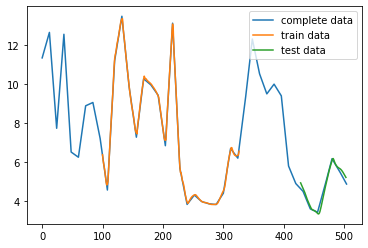

In [87]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(labels=["complete data","train data","test data"])
plt.show()          #blue=complete data
                    #orange=train data
                    #green=test data

### Forecasting for next 30 months

In [90]:
len(test_data)

177

###### Providing input from 77 because it depends on previous 100 months

In [89]:
x_input=test_data[77:].reshape(1,-1)# reshape because we have given the input size in that way
x_input.shape

(1, 100)

In [90]:
x_input

array([[0.32541024, 0.29557434, 0.26573844, 0.23590254, 0.22844356,
        0.22098458, 0.21352561, 0.20606663, 0.19860766, 0.19114868,
        0.18368971, 0.17623073, 0.16877176, 0.16131278, 0.1538538 ,
        0.14639483, 0.14307973, 0.13976463, 0.13644953, 0.13313443,
        0.12981933, 0.12650423, 0.12318913, 0.11987403, 0.11655893,
        0.11324383, 0.10992873, 0.10661363, 0.09917122, 0.09172882,
        0.08428642, 0.07684402, 0.06940162, 0.06195922, 0.05451682,
        0.04707442, 0.03963202, 0.03218962, 0.02474722, 0.01730482,
        0.01586275, 0.01442069, 0.01297862, 0.01153655, 0.01009448,
        0.00865241, 0.00721034, 0.00576827, 0.00432621, 0.00288414,
        0.00144207, 0.        , 0.01105586, 0.02211172, 0.03316758,
        0.04422344, 0.0552793 , 0.06633516, 0.07739102, 0.08844688,
        0.09950273, 0.11055859, 0.12161445, 0.13267031, 0.14438091,
        0.1560915 , 0.16780209, 0.17951268, 0.19122327, 0.20293386,
        0.21464446, 0.22635505, 0.23806564, 0.24

In [91]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()  # data type was converted from Series to List.
temp_input

[0.3254102436598707,
 0.295574341123819,
 0.26573843858776725,
 0.23590253605171552,
 0.22844356041770253,
 0.22098458478368976,
 0.21352560914967678,
 0.2060666335156638,
 0.1986076578816509,
 0.19114868224763792,
 0.18368970661362505,
 0.17623073097961217,
 0.16877175534559918,
 0.1613127797115863,
 0.15385380407757338,
 0.14639482844356044,
 0.14307972816177694,
 0.13976462787999339,
 0.13644952759820989,
 0.13313442731642627,
 0.12981932703464277,
 0.12650422675285927,
 0.12318912647107577,
 0.11987402618929227,
 0.11655892590750866,
 0.11324382562572516,
 0.1099287253439416,
 0.1066136250621581,
 0.0991712249295541,
 0.0917288247969501,
 0.0842864246643461,
 0.0768440245317421,
 0.06940162439913805,
 0.06195922426653405,
 0.05451682413393,
 0.047074424001326,
 0.039632023868722,
 0.032189623736118,
 0.024747223603514,
 0.017304823470909947,
 0.01586275484833416,
 0.014420686225758317,
 0.012978617603182474,
 0.011536548980606631,
 0.010094480358030844,
 0.008652411735454946,
 0.00

In [92]:
#demonstrate prediction for next 30  months
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16859522]
101
1 month input [0.29557434 0.26573844 0.23590254 0.22844356 0.22098458 0.21352561
 0.20606663 0.19860766 0.19114868 0.18368971 0.17623073 0.16877176
 0.16131278 0.1538538  0.14639483 0.14307973 0.13976463 0.13644953
 0.13313443 0.12981933 0.12650423 0.12318913 0.11987403 0.11655893
 0.11324383 0.10992873 0.10661363 0.09917122 0.09172882 0.08428642
 0.07684402 0.06940162 0.06195922 0.05451682 0.04707442 0.03963202
 0.03218962 0.02474722 0.01730482 0.01586275 0.01442069 0.01297862
 0.01153655 0.01009448 0.00865241 0.00721034 0.00576827 0.00432621
 0.00288414 0.00144207 0.         0.01105586 0.02211172 0.03316758
 0.04422344 0.0552793  0.06633516 0.07739102 0.08844688 0.09950273
 0.11055859 0.12161445 0.13267031 0.14438091 0.1560915  0.16780209
 0.17951268 0.19122327 0.20293386 0.21464446 0.22635505 0.23806564
 0.24977623 0.26148682 0.27319741 0.26807558 0.26295375 0.25783192
 0.25271009 0.24758826 0.24246643 0.2373446  0.23222277 0.22710094
 0.22197911 0.21685728 0.211735

9 month output [[0.41314954]]
10 month input [0.18368971 0.17623073 0.16877176 0.16131278 0.1538538  0.14639483
 0.14307973 0.13976463 0.13644953 0.13313443 0.12981933 0.12650423
 0.12318913 0.11987403 0.11655893 0.11324383 0.10992873 0.10661363
 0.09917122 0.09172882 0.08428642 0.07684402 0.06940162 0.06195922
 0.05451682 0.04707442 0.03963202 0.03218962 0.02474722 0.01730482
 0.01586275 0.01442069 0.01297862 0.01153655 0.01009448 0.00865241
 0.00721034 0.00576827 0.00432621 0.00288414 0.00144207 0.
 0.01105586 0.02211172 0.03316758 0.04422344 0.0552793  0.06633516
 0.07739102 0.08844688 0.09950273 0.11055859 0.12161445 0.13267031
 0.14438091 0.1560915  0.16780209 0.17951268 0.19122327 0.20293386
 0.21464446 0.22635505 0.23806564 0.24977623 0.26148682 0.27319741
 0.26807558 0.26295375 0.25783192 0.25271009 0.24758826 0.24246643
 0.2373446  0.23222277 0.22710094 0.22197911 0.21685728 0.21173545
 0.2060915  0.20044754 0.19480358 0.18915962 0.18351566 0.17787171
 0.17222775 0.16658379 0.

 0.54418135 0.57275212 0.60894656 0.65448081]
19 month output [[0.7105449]]
20 month input [0.12981933 0.12650423 0.12318913 0.11987403 0.11655893 0.11324383
 0.10992873 0.10661363 0.09917122 0.09172882 0.08428642 0.07684402
 0.06940162 0.06195922 0.05451682 0.04707442 0.03963202 0.03218962
 0.02474722 0.01730482 0.01586275 0.01442069 0.01297862 0.01153655
 0.01009448 0.00865241 0.00721034 0.00576827 0.00432621 0.00288414
 0.00144207 0.         0.01105586 0.02211172 0.03316758 0.04422344
 0.0552793  0.06633516 0.07739102 0.08844688 0.09950273 0.11055859
 0.12161445 0.13267031 0.14438091 0.1560915  0.16780209 0.17951268
 0.19122327 0.20293386 0.21464446 0.22635505 0.23806564 0.24977623
 0.26148682 0.27319741 0.26807558 0.26295375 0.25783192 0.25271009
 0.24758826 0.24246643 0.2373446  0.23222277 0.22710094 0.22197911
 0.21685728 0.21173545 0.2060915  0.20044754 0.19480358 0.18915962
 0.18351566 0.17787171 0.17222775 0.16658379 0.16093983 0.15529587
 0.14965191 0.14400796 0.16859522 0.18

28 month output [[0.9852652]]
29 month input [0.09172882 0.08428642 0.07684402 0.06940162 0.06195922 0.05451682
 0.04707442 0.03963202 0.03218962 0.02474722 0.01730482 0.01586275
 0.01442069 0.01297862 0.01153655 0.01009448 0.00865241 0.00721034
 0.00576827 0.00432621 0.00288414 0.00144207 0.         0.01105586
 0.02211172 0.03316758 0.04422344 0.0552793  0.06633516 0.07739102
 0.08844688 0.09950273 0.11055859 0.12161445 0.13267031 0.14438091
 0.1560915  0.16780209 0.17951268 0.19122327 0.20293386 0.21464446
 0.22635505 0.23806564 0.24977623 0.26148682 0.27319741 0.26807558
 0.26295375 0.25783192 0.25271009 0.24758826 0.24246643 0.2373446
 0.23222277 0.22710094 0.22197911 0.21685728 0.21173545 0.2060915
 0.20044754 0.19480358 0.18915962 0.18351566 0.17787171 0.17222775
 0.16658379 0.16093983 0.15529587 0.14965191 0.14400796 0.16859522
 0.18156026 0.20186436 0.2255529  0.25217831 0.28175005 0.313878
 0.34760225 0.38136005 0.41314954 0.44111061 0.46444717 0.48403552
 0.50210583 0.5213351

In [93]:
month_new = np.arange(1,101) #we use 101 because we use previous 100 data to forscast
month_pred = np.arange(101,131) # 131 because we are going to forecast next 30 months

In [94]:
len(df1)

505

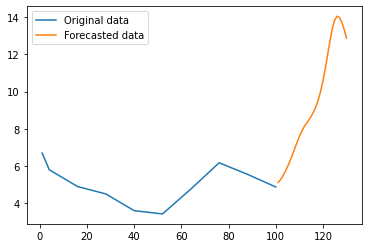

In [95]:
plt.plot(month_new,scaler.inverse_transform(df1[405:]))
plt.plot(month_pred,scaler.inverse_transform(lst_output))
plt.legend(labels=["Original data","Forecasted data"])

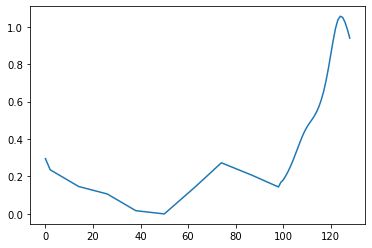

In [96]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[406:])

In [99]:
df3=scaler.inverse_transform(df3).tolist()

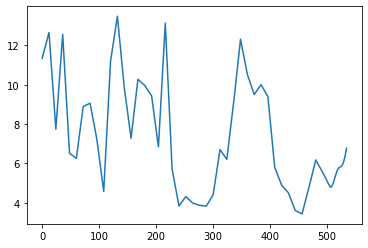

In [100]:
plt.plot(df3)
plt.show()